In [1]:
# Import All Necessary Libraries
import numpy as np
import pandas as pd
from prophet import Prophet
from pathlib import Path
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load Dataset
from pathlib import Path
import pandas as pd

# Define the file path
file_path = Path("..") / "data" / "Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv" # Suitable for within Github repository
#file_path = '/content/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'                         # for when working in same directory

# Load the CSV file
df = pd.read_csv(file_path)

print(df.columns)
#df.head()

Index(['Country', 'Year', 'Expenditure-Share_of_Govt_spending',
       'Expenditure-Share_of_GDP', 'Expenditure_Per_Capita',
       'Expenditure_Constant_2022', 'Region', 'Subregion', 'index_level',
       'total_rank_from_avg_rank', 'avg_rank', 'Deadliness_rank',
       'Diffusion_rank', 'Danger_rank', 'Fragmentation_rank',
       'Deadliness_scaled_rank', 'Diffusion_scaled_rank', 'Danger_scaled_rank',
       'Fragmentation_scaled_rank', 'total_score_rank', 'Deadliness_raw',
       'Diffusion_raw', 'Danger_raw', 'Fragmentation_raw', 'Deadliness_scaled',
       'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled',
       'total_score'],
      dtype='object')


In [7]:
# Using DataFrame.copy() create new dataframe to focus on spending over time by country
df2 = df[['Country', 'Year', 'Expenditure_Constant_2022']].copy() # Select three specific columns
df2.head()

,Country,Year,Expenditure_Constant_2022
0,Brazil,2000,15643.43168
1,Brazil,2001,18119.43481
2,Brazil,2002,18361.33076
3,Brazil,2003,14647.82954
4,Brazil,2004,15219.74744


In [9]:
# select the top 15 countries that we are interested in
# Filter rows for each country and run model
#First country is USA
USA_df = df2[df2['Country'] == 'United States of America']


print(USA_df)

                       Country  Year  Expenditure_Constant_2022
3676  United States of America  2000                543988.5978
3677  United States of America  2001                548406.6829
3678  United States of America  2002                615755.9324
3679  United States of America  2003                700831.9426
3680  United States of America  2004                763850.8322
3681  United States of America  2005                799032.9654
3682  United States of America  2006                810546.8128
3683  United States of America  2007                832175.3188
3684  United States of America  2008                892710.8252
3685  United States of America  2009                962957.8152
3686  United States of America  2010                990485.4121
3687  United States of America  2011                978756.9911
3688  United States of America  2012                924392.1264
3689  United States of America  2013                853288.9558
3690  United States of America  2014    

In [36]:
# Import to_datetime from pandas
from pandas import to_datetime

#set up country dataframe to be used by prophet
USA_df2= USA_df[['Year', 'Expenditure_Constant_2022']]
#USA_df2.head()

# Rename the columns to 'ds' and 'y' for use by Prophet and convert time date time stamp expected by Prophet
USA_df2 = USA_df2.rename(columns={'Year': 'ds', 'Expenditure_Constant_2022': 'y'})
USA_df2['ds'] = to_datetime(USA_df2['ds'], format='%Y')
#USA_df2.head()
# Fit the model by instantiating a new Prophet object
m = Prophet()
#Call the fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.m.fit(df)
m.fit(USA_df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy_uhmkwa/v8zf2ops.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy_uhmkwa/1scq05cz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33852', 'data', 'file=/tmp/tmpy_uhmkwa/v8zf2ops.json', 'init=/tmp/tmpy_uhmkwa/1scq05cz.json', 'output', 'file=/tmp/tmpy_uhmkwa/prophet_modelj7ci97ez/prophet_model-20241130223252.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:32:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:32:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [37]:
future = m.make_future_dataframe(periods=10, freq = "Y", include_history= True)
future.tail()

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds
29,2028-12-31
30,2029-12-31
31,2030-12-31
32,2031-12-31
33,2032-12-31


In [38]:
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])



           ds          yhat     yhat_lower    yhat_upper
0  2000-01-01  7.133887e+05  579929.496740  8.315549e+05
1  2001-01-01  7.130886e+05  574811.942160  8.390713e+05
2  2002-01-01  7.267581e+05  605100.943456  8.560818e+05
3  2003-01-01  7.387047e+05  614223.356490  8.667114e+05
4  2004-01-01  7.489247e+05  622577.587806  8.660331e+05
5  2005-01-01  7.486246e+05  625127.169685  8.715100e+05
6  2006-01-01  7.622941e+05  640114.551600  8.919040e+05
7  2007-01-01  7.742408e+05  647220.192538  9.074417e+05
8  2008-01-01  7.844607e+05  654315.650298  9.057903e+05
9  2009-01-01  7.841513e+05  658774.550138  9.046077e+05
10 2010-01-01  7.978063e+05  679056.452707  9.241360e+05
11 2011-01-01  8.097288e+05  691700.943242  9.285506e+05
12 2012-01-01  8.199245e+05  695048.645910  9.427842e+05
13 2013-01-01  8.195968e+05  695831.222440  9.393275e+05
14 2014-01-01  8.332387e+05  704202.342784  9.662583e+05
15 2015-01-01  8.451579e+05  730019.142142  9.658279e+05
16 2016-01-01  8.553503e+05  72

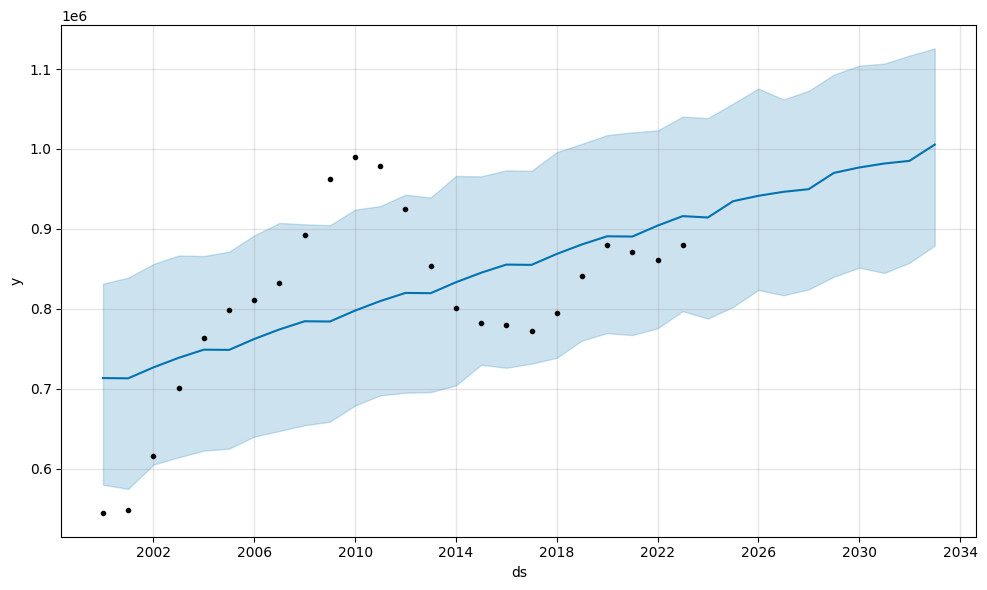

In [39]:
fig1 = m.plot(forecast)